# Program 6

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import string 

import nltk
from nltk.corpus import stopwords

from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('P6_P7_spam.csv',encoding='latin-1')

In [3]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df=df[['v1','v2']]

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.columns=['label','message']

In [8]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
def processing_text(message):
    msg_nopunc=[c for c in message if c not in string.punctuation]
    msg_nopunc=''.join(msg_nopunc)
    return [w for w in msg_nopunc.split() if w.lower() not in stopwords.words('english')]

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,random_state=0)

In [12]:
bow_transformer=CountVectorizer(analyzer=processing_text).fit(X_train)
mess_trans=bow_transformer.transform(X_train)
tfidf_transformer=TfidfTransformer(use_idf=False)
mess_tfidf=tfidf_transformer.transform(mess_trans)

In [13]:
mess_bow1=bow_transformer.transform(X_test)
tfidf_transformer1=TfidfTransformer(use_idf=False)
mess_tfidf1=tfidf_transformer1.transform(mess_bow1)

In [14]:
mess_tfidf.shape

(4457, 9832)

In [15]:
mnb=MultinomialNB()
mnb.fit(mess_tfidf,y_train)

MultinomialNB()

In [16]:
y_pred=mnb.predict(mess_tfidf1)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       949
        spam       1.00      0.64      0.78       166

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.94      1115



In [18]:
cf_matrix=confusion_matrix(y_test,y_pred)

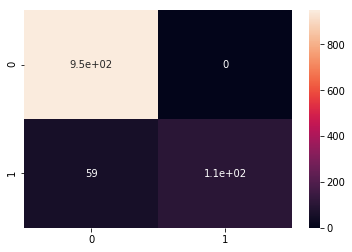

In [19]:
sns.heatmap(cf_matrix,annot=True)

In [20]:
print("Accuracy of the Naive Bayes Classifier is : ",accuracy_score(y_test,y_pred))

Accuracy of the Naive Bayes Classifier is :  0.947085201793722
